In [34]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt 
import string
import os
from PIL import Image
import glob
from pickle import dump, load
from tqdm import tqdm_notebook as tqdm
from time import time
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
import h5py
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import Bidirectional
from keras.layers.merge import add
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras import Input, layers
from keras import optimizers
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [35]:
try:
    import dill as pickle
except ImportError:
    import pickle

# Loading Caption Generator Model

In [22]:
model.load_weights('/home/vinit/Desktop/Projects/Image Captioning/model_weights/model_30.h5')

NameError: name 'model' is not defined

In [ ]:
images = '/home/vinit/Desktop/Projects/Image Captioning/Flicker8k_Dataset/'

In [24]:
with open("/home/vinit/Desktop/Projects/Image Captioning/Dataset/encoded_test_images.pkl", "rb") as encoded_pickle:
    encoding_test = load(encoded_pickle)

In [13]:
Directory_path = "/home/vinit/Desktop/Projects/Image Captioning/Flicker8k_Dataset/"

In [10]:
def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

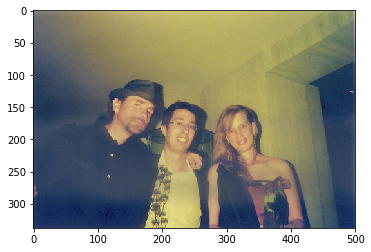

In [33]:
z = 65
pic = list(encoding_test.keys())[z]
image = encoding_test[pic].reshape((1,2048))
x=plt.imread(Directory_path+pic)
plt.imshow(x)
plt.show()
#print("Greedy:",greedySearch(image))

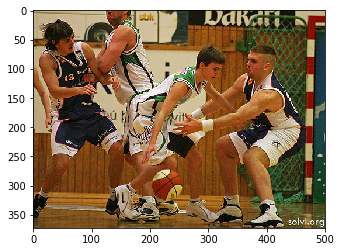

In [30]:
pic = list(encoding_test.keys())[9]
x=plt.imread(Directory_path+pic)
plt.imshow(x)
plt.show()

In [28]:
pic

'3462454965_a481809cea.jpg'